In [8]:
import svgwrite
import numpy as np
import time
import random
import pickle
import codecs
import collections
import os
import math
import json
import tensorflow as tf
from six.moves import xrange
import pandas as pd

In [2]:
# libraries required for visualisation:
from IPython.display import SVG, display
import PIL
from PIL import Image
import matplotlib.pyplot as plt

# set numpy output to something sensible
np.set_printoptions(precision=8, edgeitems=6, linewidth=200, suppress=True)

# Data

## Fonctions to work with svg data

70000
2500
2500


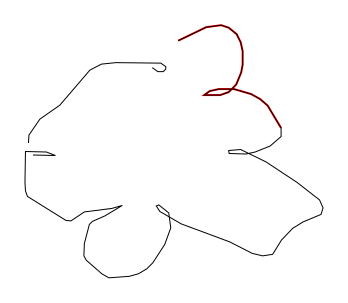

In [95]:
# helper function for draw_strokes
def get_bounds(data, factor):
  min_x = 0
  max_x = 0
  min_y = 0
  max_y = 0
    
  abs_x = 0
  abs_y = 0
  for i in xrange(len(data)):
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    abs_x += x
    abs_y += y
    min_x = min(min_x, abs_x)
    min_y = min(min_y, abs_y)
    max_x = max(max_x, abs_x)
    max_y = max(max_y, abs_y)
    
  return (min_x, max_x, min_y, max_y)

# little function that displays vector images and saves them to .svg
def draw_strokes(data, factor=2, svg_filename = 'sample.svg'):
  min_x, max_x, min_y, max_y = get_bounds(data, factor)
  dims = (50 + max_x - min_x, 50 + max_y - min_y)
  dwg = svgwrite.Drawing(svg_filename, size=dims)
  dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
  lift_pen = 1
  abs_x = 25 - min_x 
  abs_y = 25 - min_y
  p = "M%s,%s " % (abs_x, abs_y)
  command = "m"
  for i in xrange(0,20):
    if (lift_pen == 1):
      command = "m"
    elif (command != "l"):
      command = "l"
    else:
      command = ""
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    lift_pen = data[i, 2]
    p += command+str(x)+","+str(y)+" "
  the_color = "red"
  stroke_width = 2
  dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
  for i in xrange(20,len(data)):
    if (lift_pen == 1):
      command = "m"
    elif (command != "l"):
      command = "l"
    else:
      command = ""
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    lift_pen = data[i, 2]
    p += command+str(x)+","+str(y)+" "
  the_color = "black"
  stroke_width = 1
  dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
  dwg.save()
  display(SVG(dwg.tostring()))

# generate a 2D grid of many vector drawings
def make_grid_svg(s_list, grid_space=10.0, grid_space_x=15.0):
  def get_start_and_end(x):
    x = np.array(x)
    x = x[:, 0:2]
    x_start = x[0]
    x_end = x.sum(axis=0)
    x = x.cumsum(axis=0)
    x_max = x.max(axis=0)
    x_min = x.min(axis=0)
    center_loc = (x_max+x_min)*0.5
    return x_start-center_loc, x_end
  x_pos = 0.0
  y_pos = 0.0
  result = [[x_pos, y_pos, 1]]
  for sample in s_list:
    s = sample[0]
    grid_loc = sample[1]
    grid_y = grid_loc[0]*grid_space+grid_space*0.5
    grid_x = grid_loc[1]*grid_space_x+grid_space_x*0.5
    start_loc, delta_pos = get_start_and_end(s)

    loc_x = start_loc[0]
    loc_y = start_loc[1]
    new_x_pos = grid_x+loc_x
    new_y_pos = grid_y+loc_y
    result.append([new_x_pos-x_pos, new_y_pos-y_pos, 0])

    result += s.tolist()
    result[-1][2] = 1
    x_pos = new_x_pos+delta_pos[0]
    y_pos = new_y_pos+delta_pos[1]
  return np.array(result)
#test_set = np.load(data_dir, encoding='latin1', allow_pickle=True)
# get a sample drawing from the test set, and render it to .svg



70000
2500
2500


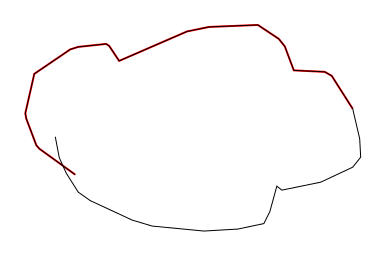

In [163]:
#Focus on cloud for the begining
data_dir = 'cloud.npz'

load_data = np.load(data_dir, encoding='latin1', allow_pickle=True) #specific to python3
train_set = load_data['train']
valid_set = load_data['valid']
test_set = load_data['test']

print (len(train_set))
print (len(valid_set))
print (len(test_set))

draw_strokes(random.choice(test_set))

# Linear regression

## Creating the model

In [ ]:
S_reg = #size of the window for he regression

In [10]:
X= np.empty([0,S_reg*3])
line= np.array([])
Y=np.array([])

In [11]:
#warning: x goes into floating...
for data in test_set:
    i=20
    while i <= (len(data)-1):
        line= np.array([])
        for j in range (S_reg):
            line = np.concatenate((line, data[i-S_reg+j]), 0)
        #print(X,line)
        X = np.vstack((X, line))
        Y = np.concatenate((Y, data[i]), 0) #to change
        i+=1

In [14]:
Y=Y.reshape((int(len(Y)/3), 3)) #to change
X=X.T

In [15]:
inv=np.linalg.inv(np.dot(X,X.T)+0.01*np.identity(S_reg*3))

In [20]:
W=np.dot(np.dot(inv,X),Y)

array([[-0.05142648,  0.00578678, -0.00003409],
       [-0.00223039, -0.05832702, -0.00003419],
       [-2.71009532, -2.3697253 , -0.00057025],
       [-0.03555299, -0.00144316, -0.0000261 ],
       [-0.00093701, -0.02823065, -0.00004209],
       [-5.4744683 , -0.66450859,  0.03920821],
       [-0.02665121, -0.00119807, -0.00002022],
       [-0.00562187, -0.02934665,  0.00001955],
       [-2.24119104, -1.4677865 ,  0.03720833],
       [-0.02963194,  0.00243702, -0.00000276],
       [-0.01544645, -0.01562957, -0.00006315],
       [-0.44784249, -1.78262233,  0.02788904],
       [-0.01808325,  0.00425106, -0.00007267],
       [-0.00222875, -0.0143558 , -0.00000495],
       [ 1.79399531, -0.3788952 ,  0.05739502],
       [-0.01514243, -0.00234317, -0.00000123],
       [ 0.00364187, -0.01384502, -0.00006239],
       [ 2.5469109 ,  0.35890419,  0.02857008],
       [-0.01526267,  0.00091078, -0.00004241],
       [ 0.0148058 , -0.0206625 , -0.00009399],
       [-2.89250755, -0.84627895,  0.053

## Testing the model

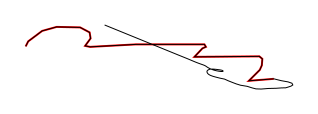

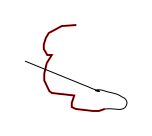

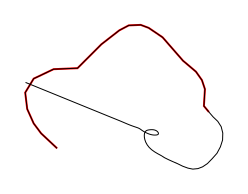

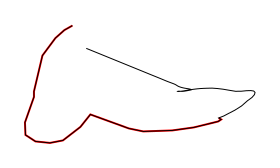

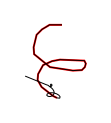

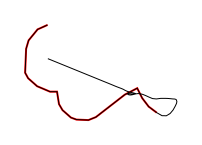

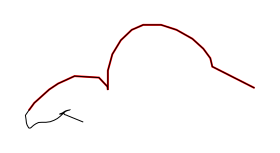

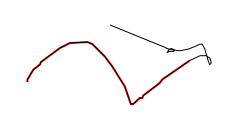

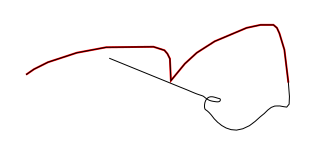

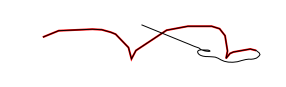

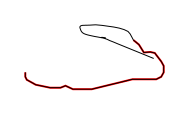

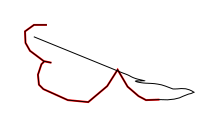

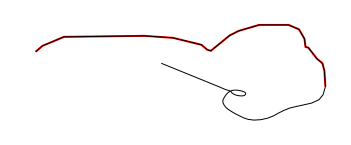

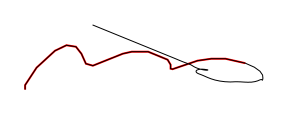

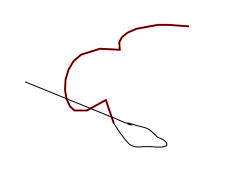

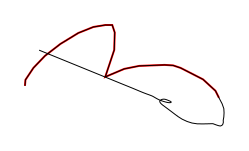

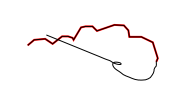

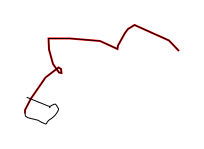

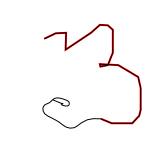

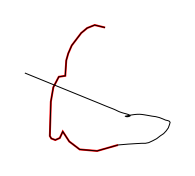

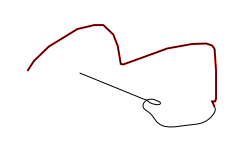

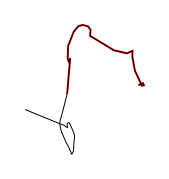

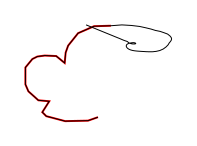

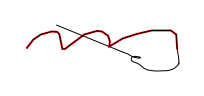

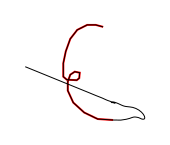

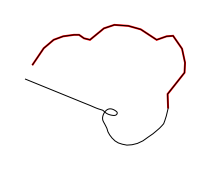

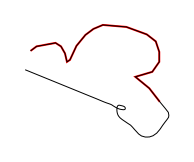

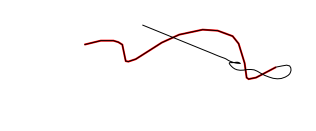

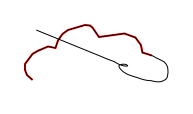

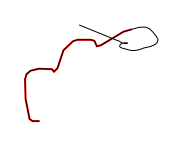

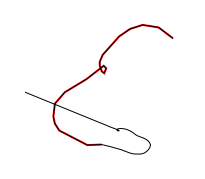

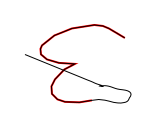

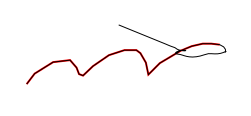

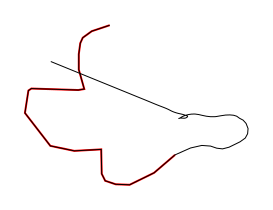

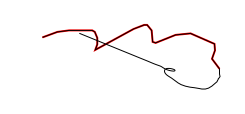

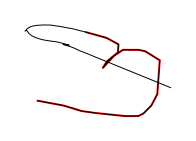

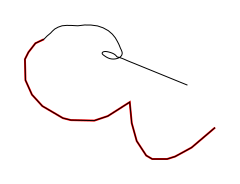

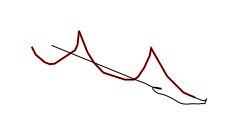

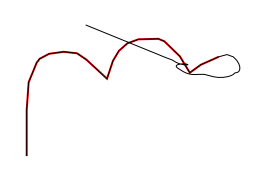

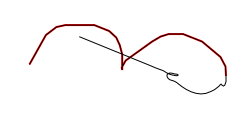

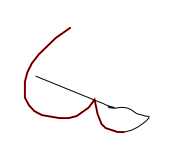

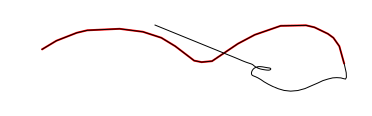

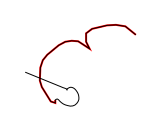

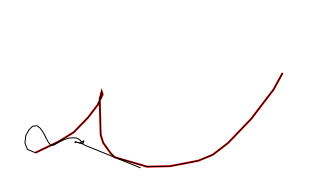

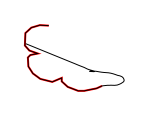

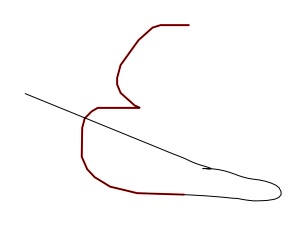

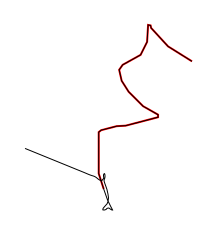

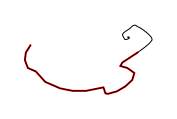

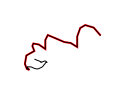

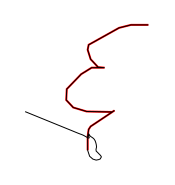

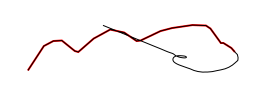

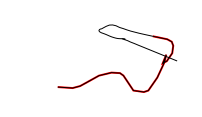

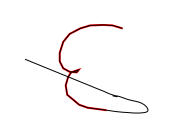

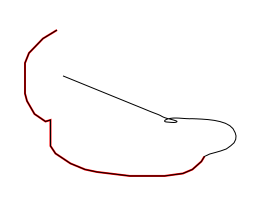

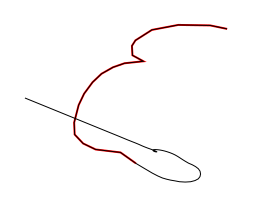

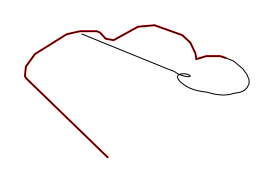

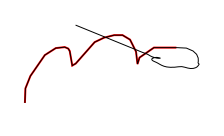

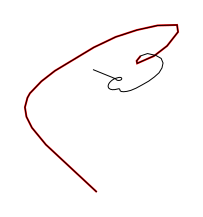

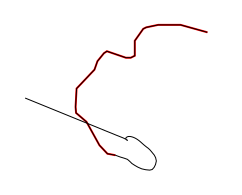

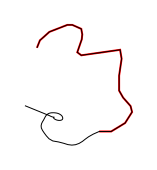

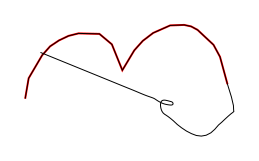

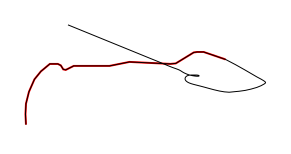

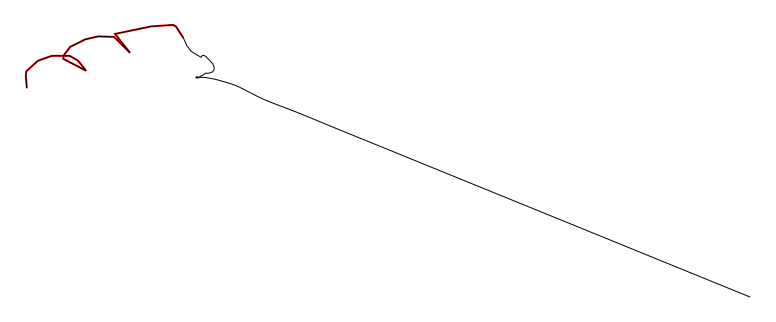

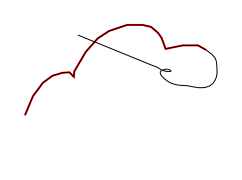

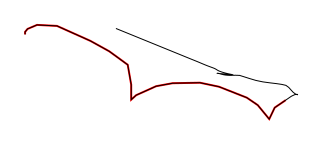

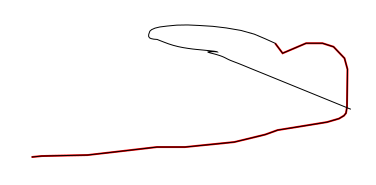

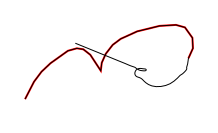

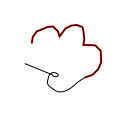

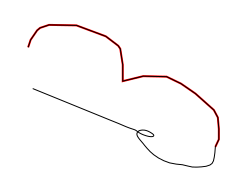

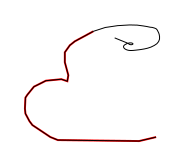

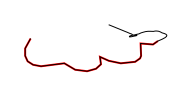

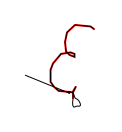

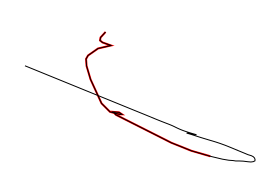

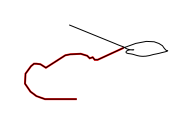

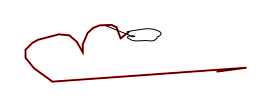

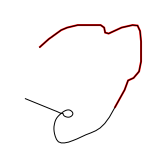

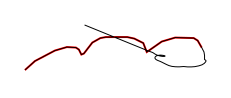

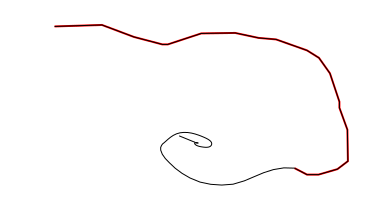

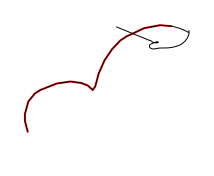

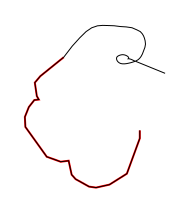

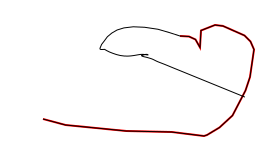

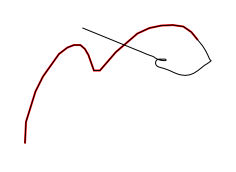

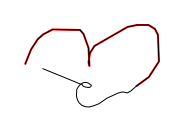

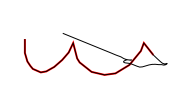

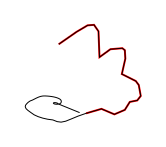

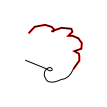

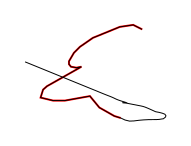

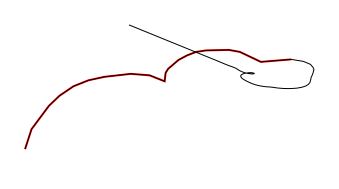

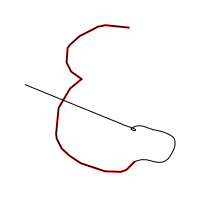

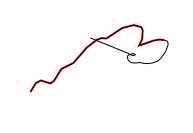

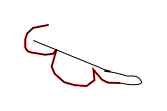

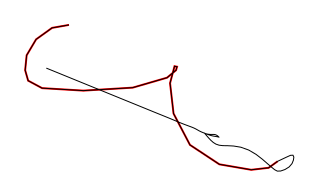

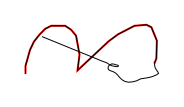

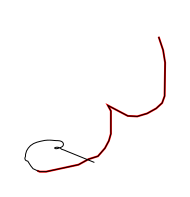

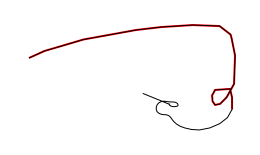

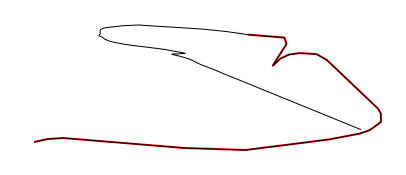

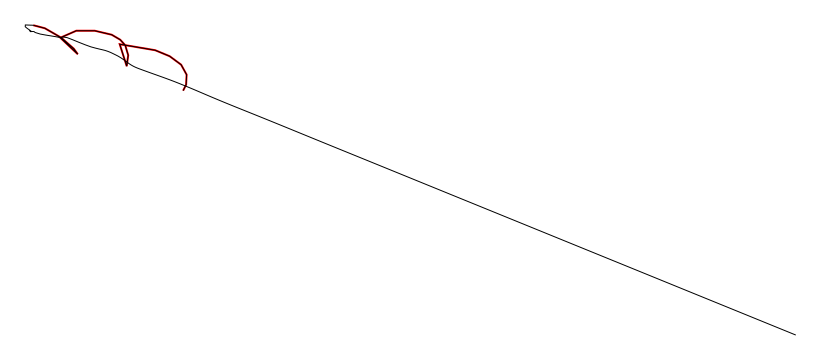

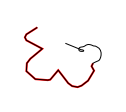

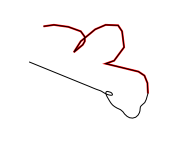

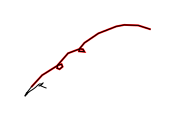

In [34]:
for test in range (0,100):
    ini=np.array([])
    for i in range(20):
        ini=np.concatenate((ini, train_set[test][i]), 0)
    draw=train_set[test][0:20]
    for i in range (300):
        draw=np.vstack((draw, np.dot(W.T,ini)))
        ini=np.concatenate((ini, draw[-1]), 0)
        ini = np.delete(ini, [0,1,2])
    draw[:, 2]=0 # I do not take into account the different strokes
    draw_strokes(draw)

# Echo State network

## Creating the model

In [135]:
for count,sample in enumerate(train_set[0:2500]):
    if count==0:
        X_train=sample
    else:
        X_train = np.vstack((X_train,sample))
    train_set[count]=np.tanh(np.delete(sample, 2, axis=1)/100) #trick for not caring about different strokes 

In [136]:
# -*- coding: utf-8 -*-
"""
A minimalistic Echo State Networks demo with Mackey-Glass (delay 17) data 
in "plain" scientific Python.
from https://mantas.info/code/simple_esn/
(c) 2012-2020 Mantas LukoÅ¡eviÄius
Distributed under MIT license https://opensource.org/licenses/MIT
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg 
# numpy.linalg is also an option for even fewer dependencies

# load the data
data = train_set[0:2000]
trainLen = len(X_train) 
testLen = len(X_train) 
initLen = 0 #Warning higly reduced


# generate the ESN reservoir
inSize = outSize = 2
resSize = 1000
L_a = [0.3,1,5] # leaking rate
np.random.seed(42)
L_Win = [(np.random.rand(resSize,1+inSize) - 0.5) *i for i in [0.1,1,2]]
label_Win = [0.1,1,2]

W = np.random.rand(resSize,resSize) - 0.5 
# normalizing and setting spectral radius (correct, slow):
print('Computing spectral radius...')
rhoW = max(abs(linalg.eig(W)[0]))
print('done.')
L_W = [W*i / rhoW for i in [0.75,1,1.25]]
label_W = [0.75,1,1.5]

# allocated memory for the design (collected states) matrix
X = np.zeros((1+inSize+resSize,trainLen-(initLen+1)*len(data)))
Yt = np.zeros((outSize,trainLen-(initLen+1)*len(data)))

# set the corresponding target matrix directly
#Yt = data[None,initLen+1:trainLen+1] 

print("run reservoir")
L_XXT=[]
L_XYT=[]
# run the reservoir with the data and collect X
i=0
for W in L_W:
     for Win in L_Win:
        for a in L_a:
            i+=1
            print(i)
            # allocated memory for the design (collected states) matrix
            X = np.zeros((1+inSize+resSize,trainLen-(initLen+1)*len(data)))
            Yt = np.zeros((outSize,trainLen-(initLen+1)*len(data)))
            for sample in data:
                x = np.zeros((resSize,1))
                count_global=0
                for count,u in enumerate(sample):
                    u=np.array([u]).T
                    #print(np.vstack((1,u)))
                    x = (1-a)*x + a*np.tanh( np.dot( Win, np.vstack((1,u)) ) + np.dot( W, x ) )
                    if count >= initLen:
                        count_global += 1
                        X[:,count_global] = np.vstack((1,u,x))[:,0]
                        if count >= initLen+1:
                            Yt[:,count_global-1] = np.vstack((u))[:,0]
                    if count == len(sample)-2:
                        Yt[:,count_global-1] = np.vstack((u))[:,0]
                        break
            L_XXT.append(np.dot(X,X.T))
            L_XYT.append(np.dot(X,Yt.T))
                
print("train reservoir")
# train the output by ridge regression
Wout_list=[]
count=0
for w,W in zip(label_W,L_W):
    for win,Win in zip(label_Win,L_Win):
        for a in L_a:
            XXT=L_XXT[count]
            XYT=L_XYT[count]
            count=+1
            for i in range(8):
                reg = 1^-i  # regularization coefficient
                # direct equations from texts:
                #X_T = X.T
                #Wout = np.dot( np.dot(Yt,X_T), linalg.inv( np.dot(X,X_T) + \
                #    reg*np.eye(1+inSize+resSize) ) )
                # using scipy.linalg.solve:
                Wout = linalg.solve( XXT + reg*np.eye(1+inSize+resSize), 
                    XYT ).T
                Wout_list.append([Wout,W,str(w),Win,str(win),a,i])

Computing spectral radius...
done.
run reservoir
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
train reservoir


In [137]:
"""
with open("Nz1000_data2000_norm.txt", "wb") as fp:   #Pickling
    pickle.dump(Wout_list, fp)

with open("test.txt", "rb") as fp:   # Unpickling
    Wout_list = pickle.load(fp)"""

'\nwith open("test.txt", "rb") as fp:   # Unpickling\n    Wout_list = pickle.load(fp)'

In [138]:
from numpy import linalg as LA
L_mse=[]

for count,Wout in enumerate(Wout_list):
    Wout,W,w,Win,win,a,i=Wout
    for number in range (500):
        Y = np.zeros((outSize, len(data[number])))
        X = np.zeros((resSize, len(data[number])))
        u = np.array([data[number][0]]).T
        x = np.zeros((resSize,1))
        mse_ini=0
        mse_fill=0
        for t in range(len(data[number])):
            if t <= 15:
                u = np.array([data[number][t]]).T
                x = (1-a)*x + a*np.tanh( np.dot( Win, np.vstack((1,u)) ) + np.dot( W, x ) )
                y = np.dot(Wout, np.vstack((1,u,x)))
                #y=np.array([y]).T
                Y[:,t] = y[:,0]
                mse_ini += LA.norm(y[:,0]-data[number][t+1])
            else:
                x = (1-a)*x + a*np.tanh( np.dot( Win, np.vstack((1,u)) ) + np.dot( W, x ) )
                y = np.dot( Wout, np.vstack((1,u,x)) )
                u = y
                #print(y)
                #y=np.array([y]).T
                Y[:,t] = y[:,0]
                # generative mode:
                if t < len(data[number])-2:
                    mse_fill += LA.norm(y[:,0]-data[number][t+1])
            X[:,t]=np.array([x]).T[:,0]

            
        mse_ini = mse_ini/(15)
        mse_fill = mse_fill/len(data[number]-15)

        row = {'mse_ini' : mse_ini, 'mse_fill' : mse_fill, 'w' : float(w), 'win' : float(win),'a' : float(a),'i' : float(i),'number' : number}
    L_mse.append(row)       
df = pd.DataFrame(L_mse)
df.to_pickle("mse(Nz1000_data2000_norm)")

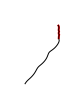

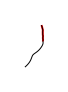

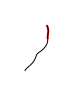

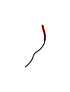

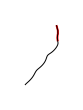

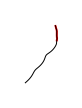

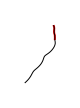

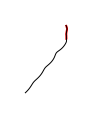

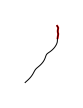

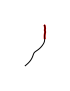

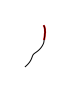

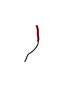

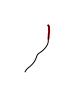

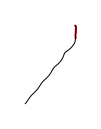

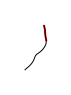

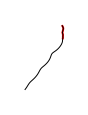

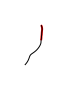

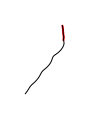

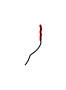

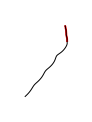

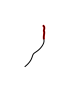

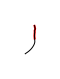

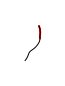

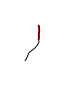

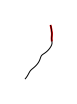

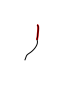

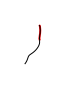

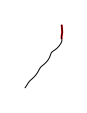

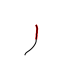

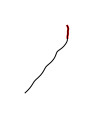

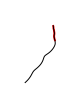

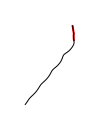

In [154]:
#To plot
for count,Wout in enumerate(Wout_list):
    Wout,W,w,Win,win,a,i=Wout
    if (w==str(1.50)) & (win==str(2)) & (a==1) & (i==3.0):
        for number in range (0,5):
            Y = np.zeros((outSize, len(data[number])))
            X = np.zeros((resSize, len(data[number])))
            u = np.array([data[number][0]]).T
            x = np.zeros((resSize,1))
            mse_ini=0
            mse_fill=0
            for t in range(len(data[number])):
                if t <= 20:
                    u = np.array([data[number][t]]).T
                    x = (1-a)*x + a*np.tanh( np.dot( Win, np.vstack((1,u)) ) + np.dot( W, x ) )
                    y = np.dot(Wout, np.vstack((1,u,x)))
                    #y=np.array([y]).T
                    Y[:,t] = y[:,0]
                    mse_ini += LA.norm(y[:,0]-data[number][t+1])
                else:
                    x = (1-a)*x + a*np.tanh( np.dot( Win, np.vstack((1,u)) ) + np.dot( W, x ) )
                    y = np.dot( Wout, np.vstack((1,u,x)) )
                    u = y

                    Y[:,t] = y[:,0]
                    # generative mode:
                    if t < len(data[number])-2:
                        mse_fill += LA.norm(y[:,0]-data[number][t+1])
                X[:,t]=np.array([x]).T[:,0]
                
            N = 2
            b = np.zeros((len(data[number]),N+1))
            b[:,:-1] = Y.T
            #print(Y.T)
            #print(b)
            draw_strokes(b,factor=2,svg_filename = str(number)+'sample.svg')

In [97]:
        N = 2
        a = np.random.rand(N,N)
        b = np.zeros((N,N+1))
        b[:,:-1] = a
        b

array([[0.22926543, 0.64838748, 0.        ],
       [0.88784215, 0.32951422, 0.        ]])

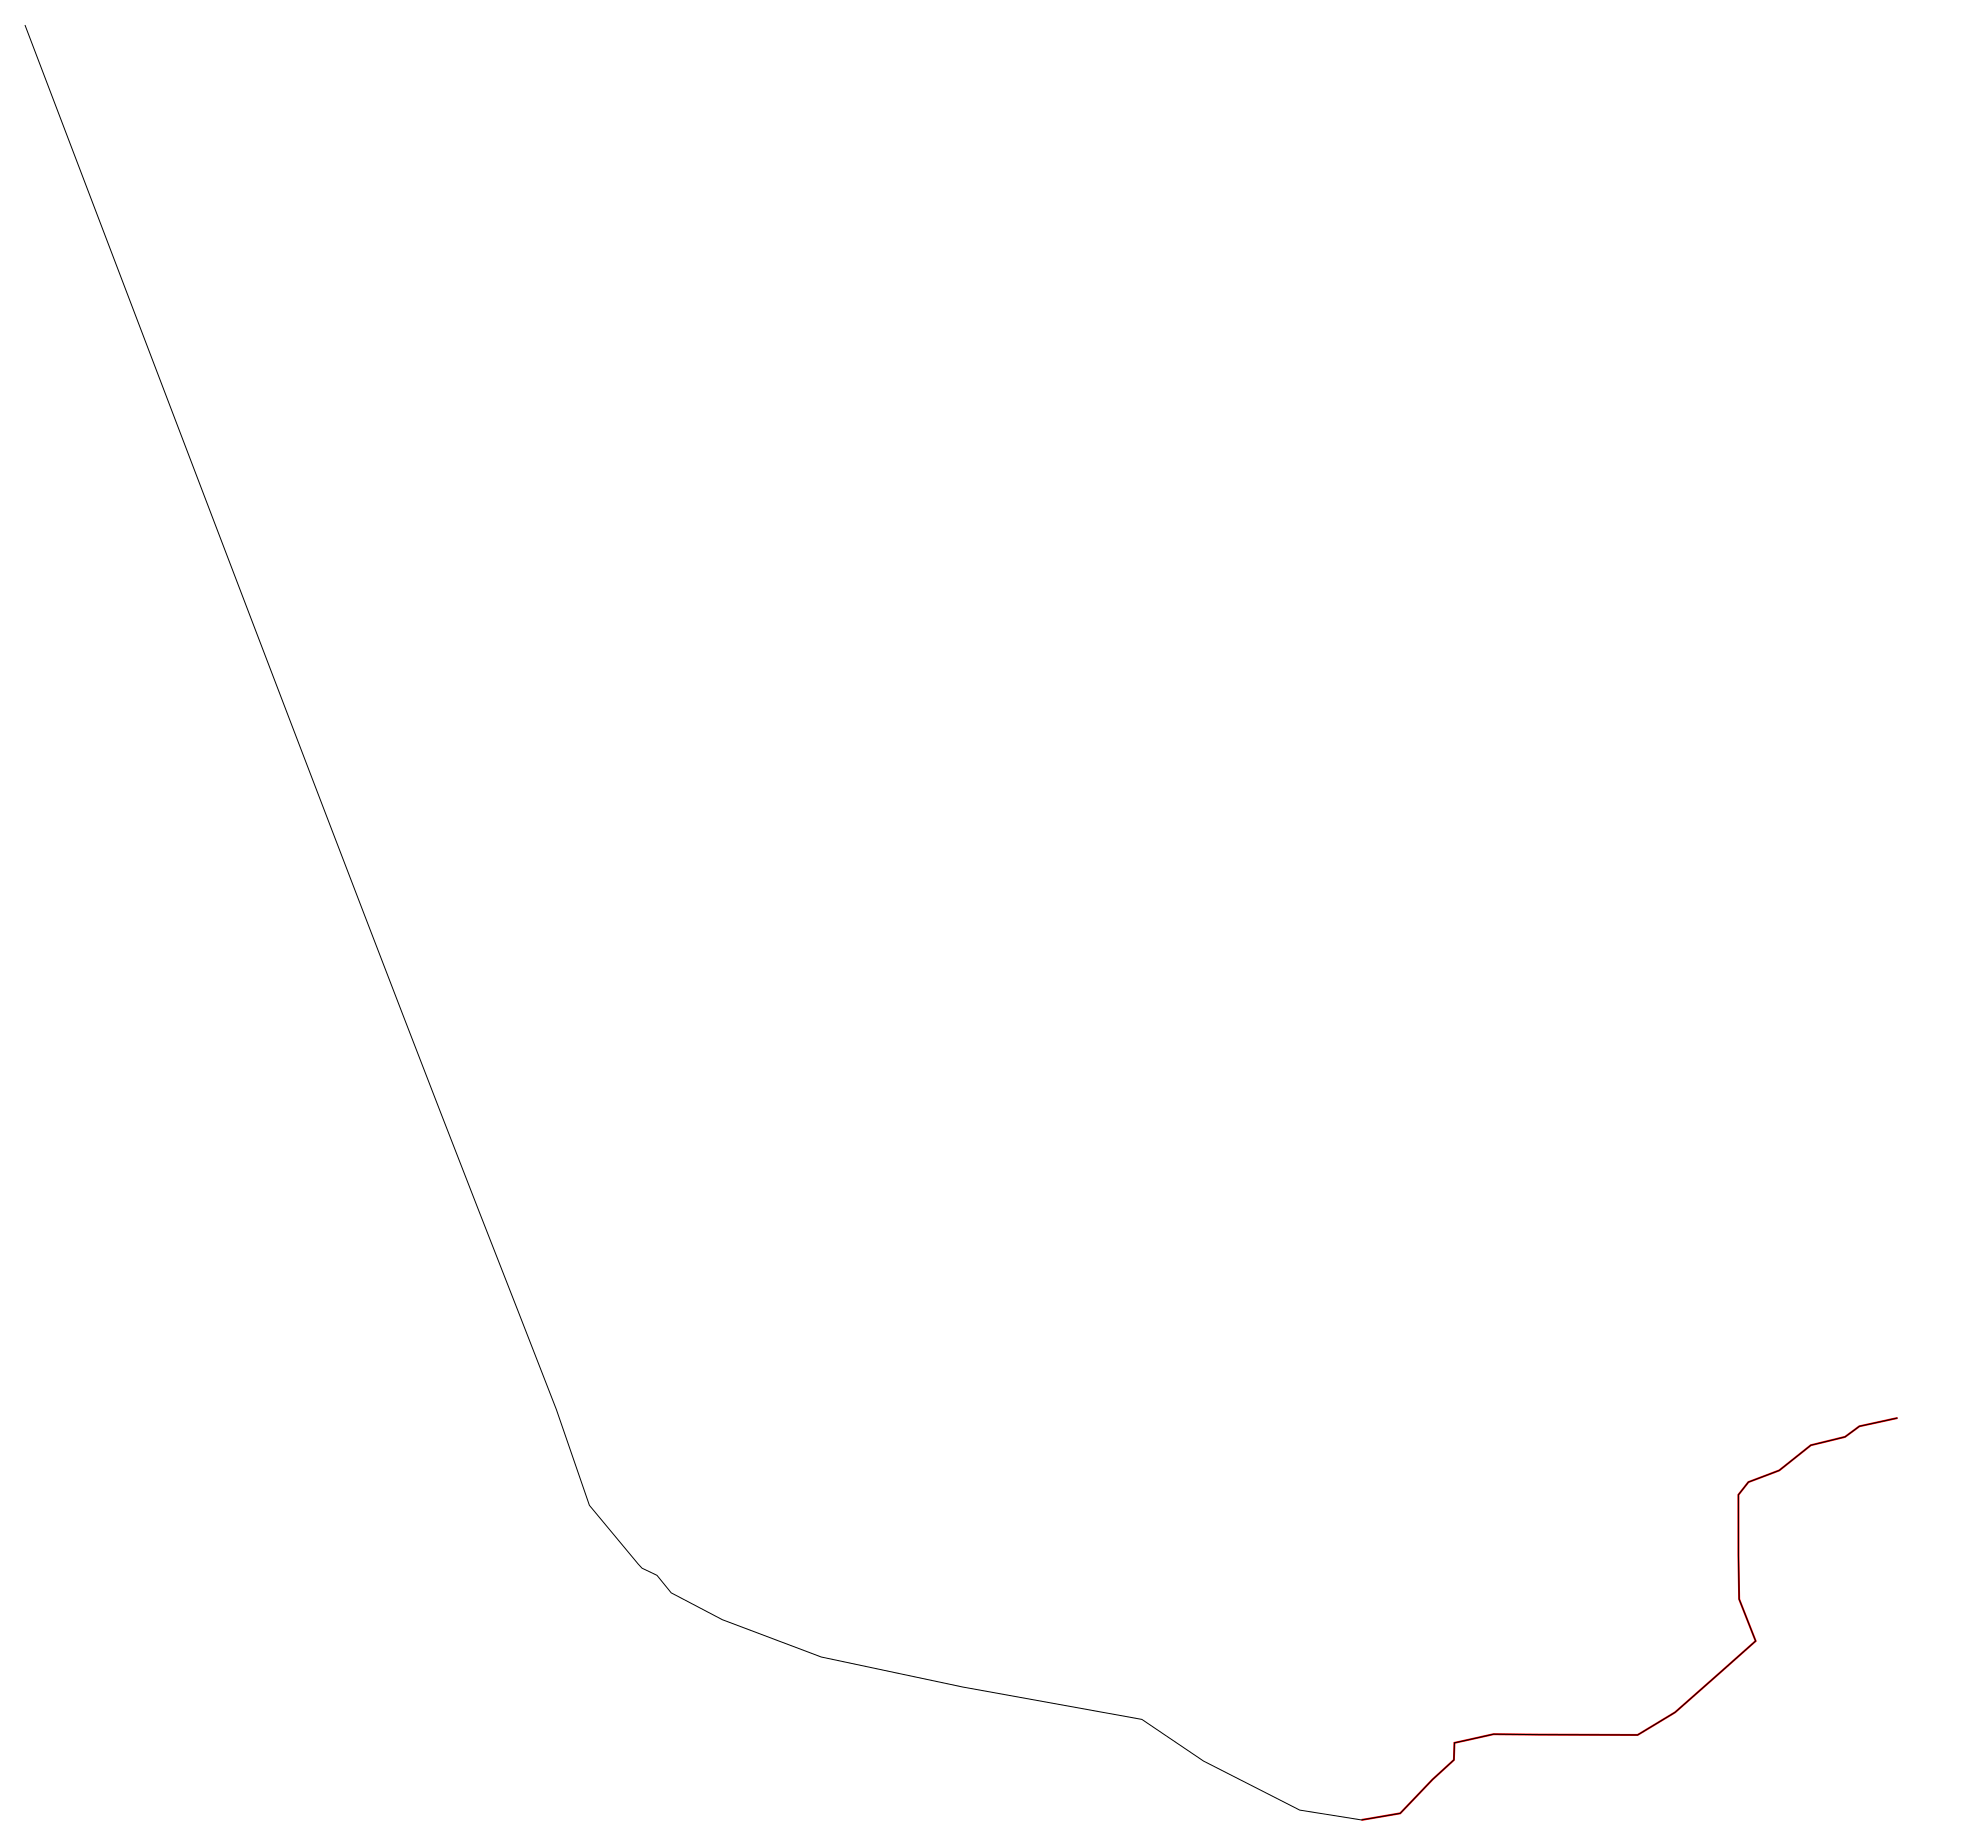

In [83]:
draw_strokes(b)

In [49]:
# -*- coding: utf-8 -*-
"""
A minimalistic Echo State Networks demo with Mackey-Glass (delay 17) data 
in "plain" scientific Python.
from https://mantas.info/code/simple_esn/
(c) 2012-2020 Mantas LukoÅ¡eviÄius
Distributed under MIT license https://opensource.org/licenses/MIT
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg 
# numpy.linalg is also an option for even fewer dependencies

# load the data
trainLen = 2000
testLen = 2000
initLen = 100
data = np.loadtxt('MackeyGlass_t17.txt')

# plot some of it
plt.figure(10).clear()
plt.plot(data[:1000])
plt.title('A sample of data')

# generate the ESN reservoir
inSize = outSize = 1
resSize = 1000
a = 0.3 # leaking rate
np.random.seed(42)
Win = (np.random.rand(resSize,1+inSize) - 0.5) * 1
W = np.random.rand(resSize,resSize) - 0.5 
# normalizing and setting spectral radius (correct, slow):
print('Computing spectral radius...')
rhoW = max(abs(linalg.eig(W)[0]))
print('done.')
W *= 1.25 / rhoW

# allocated memory for the design (collected states) matrix
X = np.zeros((1+inSize+resSize,trainLen-initLen))
# set the corresponding target matrix directly
Yt = data[None,initLen+1:trainLen+1] 

# run the reservoir with the data and collect X
x = np.zeros((resSize,1))
for t in range(trainLen):
    u = data[t]
    x = (1-a)*x + a*np.tanh( np.dot( Win, np.vstack((1,u)) ) + np.dot( W, x ) )
    if t >= initLen:
        X[:,t-initLen] = np.vstack((1,u,x))[:,0]
    
# train the output by ridge regression
reg = 1e-8  # regularization coefficient
# direct equations from texts:
#X_T = X.T
#Wout = np.dot( np.dot(Yt,X_T), linalg.inv( np.dot(X,X_T) + \
#    reg*np.eye(1+inSize+resSize) ) )
# using scipy.linalg.solve:
Wout = linalg.solve( np.dot(X,X.T) + reg*np.eye(1+inSize+resSize), 
    np.dot(X,Yt.T) ).T

# run the trained ESN in a generative mode. no need to initialize here, 
# because x is initialized with training data and we continue from there.
Y = np.zeros((outSize,testLen))
u = data[trainLen]
for t in range(testLen):
    x = (1-a)*x + a*np.tanh( np.dot( Win, np.vstack((1,u)) ) + np.dot( W, x ) )
    y = np.dot( Wout, np.vstack((1,u,x)) )
    Y[:,t] = y
    # generative mode:
    u = y
    ## this would be a predictive mode:
    #u = data[trainLen+t+1] 

# compute MSE for the first errorLen time steps
errorLen = 500
mse = sum( np.square( data[trainLen+1:trainLen+errorLen+1] - 
    Y[0,0:errorLen] ) ) / errorLen
print('MSE = ' + str( mse ))
    
# plot some signals
plt.figure(1).clear()
plt.plot( data[trainLen+1:trainLen+testLen+1], 'g' )
plt.plot( Y.T, 'b' )
plt.title('Target and generated signals $y(n)$ starting at $n=0$')
plt.legend(['Target signal', 'Free-running predicted signal'])

plt.figure(2).clear()
plt.plot( X[0:20,0:200].T )
plt.title(r'Some reservoir activations $\mathbf{x}(n)$')

plt.figure(3).clear()
plt.bar( np.arange(1+inSize+resSize), Wout[0].T )
plt.title(r'Output weights $\mathbf{W}^{out}$')

plt.show()


## Data_analysis

In [ ]:
%matplotlib inline
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [64]:
df

,mse_ini,mse_fill,w,win,a,i,number
0,1.265949e+01,1.523250e+01,0.75,0.01,0.3,0.0,99
1,2.593318e+01,1.019047e+02,0.75,0.01,0.3,1.0,99
2,1.334455e+01,1.724129e+01,0.75,0.01,0.3,2.0,99
3,2.262933e+01,2.431976e+02,0.75,0.01,0.3,3.0,99
4,4.611055e+02,1.106034e+47,0.75,0.01,0.3,4.0,99
...,...,...,...,...,...,...,...
211,4.738515e+10,3.813782e+30,1.50,2.00,5.0,3.0,99
212,4.373915e+10,3.267731e+30,1.50,2.00,5.0,4.0,99
213,8.450664e+10,5.756562e+30,1.50,2.00,5.0,5.0,99
214,3.981160e+10,3.317635e+30,1.50,2.00,5.0,6.0,99


In [72]:
df['w']

0      0.75
1      0.75
2      0.75
3      0.75
4      0.75
       ... 
211    1.50
212    1.50
213    1.50
214    1.50
215    1.50
Name: w, Length: 216, dtype: float64

In [160]:
df_i=df
df_i= df.groupby(['w','win','a',"i"])['mse_fill'].mean().reset_index()
df_i[df_i.mse_fill<0.2]

,w,win,a,i,mse_fill
0,0.75,0.1,0.3,0.0,0.180404
7,0.75,0.1,0.3,7.0,0.176937
8,0.75,0.1,1.0,0.0,0.179263
9,0.75,0.1,1.0,1.0,0.185196
10,0.75,0.1,1.0,2.0,0.194383


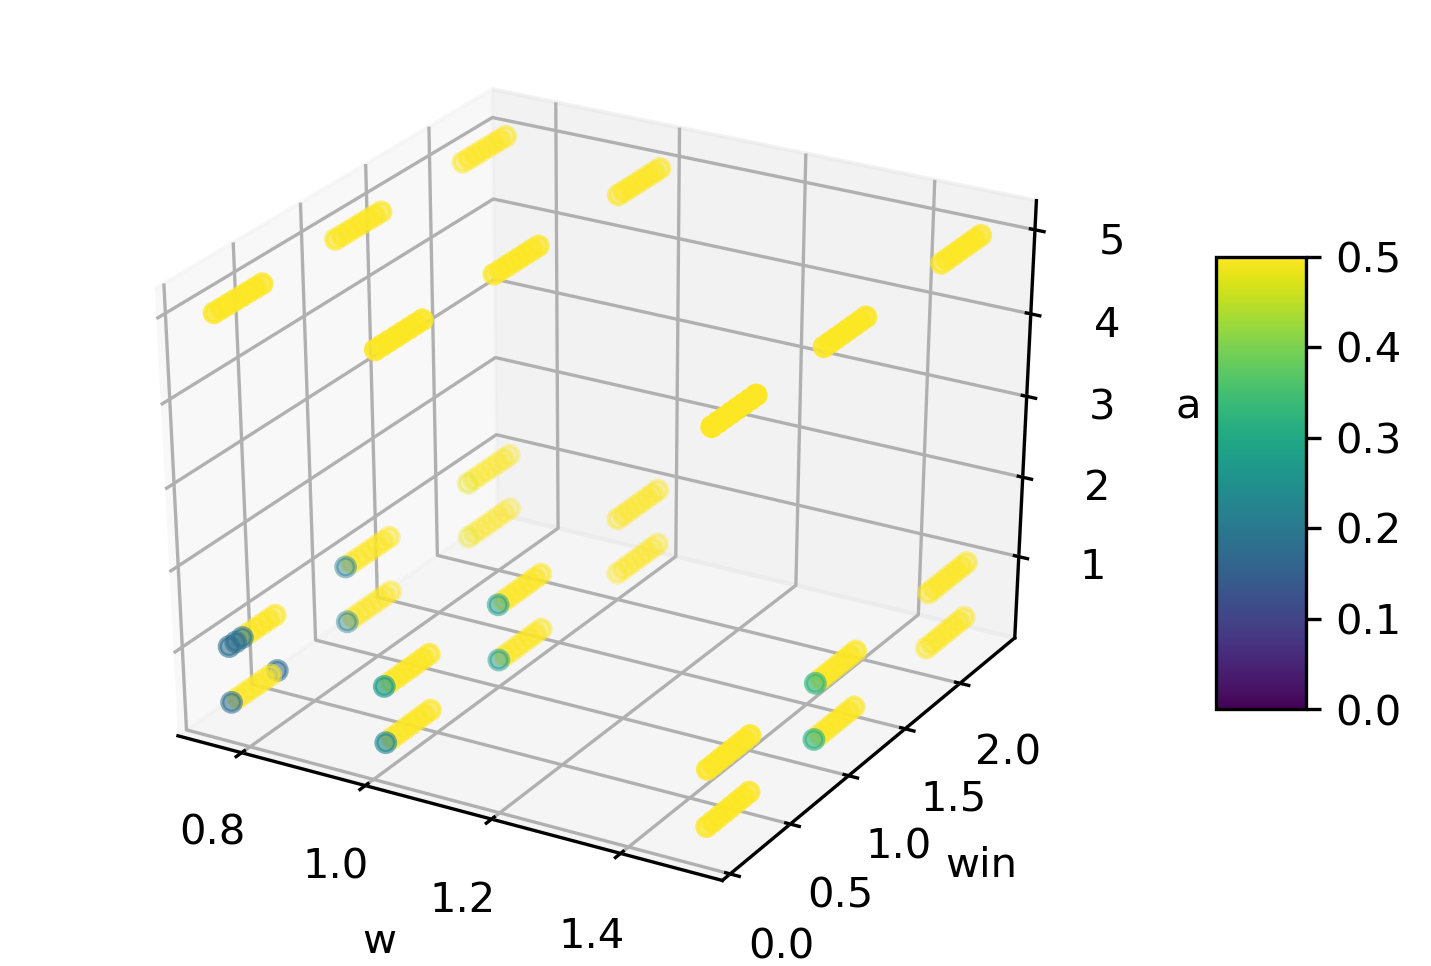

<Figure size 432x288 with 0 Axes>

In [159]:
fig = plt.figure(dpi=300)
ax = fig.gca(projection='3d')
for i in range (8):

    df_i=df[df.i == i ]
    df_i= df_i.groupby(['w','win','a'])['mse_fill'].mean().reset_index()
    xs = list(df_i['w'])
    ys = list(df_i['win']+0.05*i)
    zs = list(df_i['a'])
    ss = list(df_i['mse_fill'])
    #print(xs)
    
    ax.set_xlabel('w')
    ax.set_ylabel('win')
    ax.set_zlabel('a')

    surf=ax.scatter3D(xs, ys, zs, c=ss,vmin=0,vmax=0.5,s=20)#, lw=0, s=100,alpha=1,marker="o",vmin=vmin,vmax=vmax)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
plt.clf()